In [88]:
import sys
from deepface import DeepFace
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
print(sys.version)
print(np.__version__)
print(tf.__version__)

3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]
1.26.4
2.10.1


In [ ]:
imgpath:str = './data/scarlett-johansson/test/img-11.png'
image = cv2.imread(imgpath)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convertir BGR a RGB para matplotlib

plt.figure(figsize=(16,16))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Test Image')
plt.axis('on')

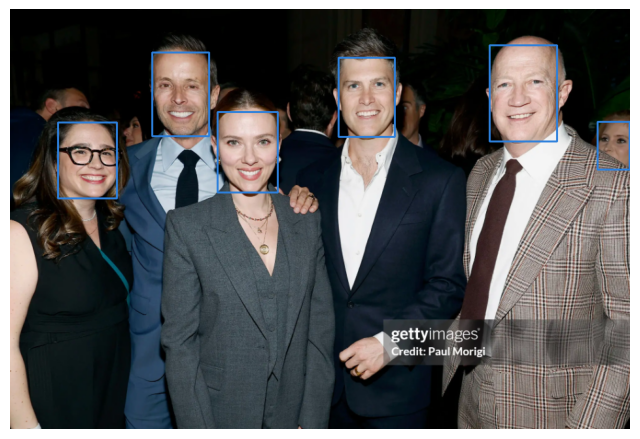

In [79]:
# Ruta de la imagen original
image_path = "./data/scarlett-johansson/test/img-11.png"

# Cargar la imagen original usando OpenCV (en formato BGR)
image = cv2.imread(image_path)

# Extraer rostros detectados en la imagen (con bounding boxes)
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Dibujar los recuadros alrededor de los rostros detectados
for face_data in faces:
    facial_area = face_data['facial_area']  # Obtener el área facial
    x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    
    # Dibujar el rectángulo sobre la imagen (BGR)
    cv2.rectangle(image, (x, y), (x + w, y + h), (220, 128, 45), 2)  # Verde (0, 255, 0)

# Convertir la imagen de BGR a RGB para mostrarla con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los recuadros usando Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
#basic example of face detection and extraction
detectors = [ 'opencv', 'retinaface', 'mtcnn', 'ssd', 'dlib', 'mediapipe', 'yolov8', 'centerface']
image_path = "./data/scarlett-johansson/test/img-11.png"

#extraer rostros detectados en la imagen
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)
#iterar sobre cada rostro detectado y mostrarlo
for i, face_data in enumerate(faces):
    face = face_data["face"]  # Obtener la imagen del rostro
    plt.figure(figsize=(4,4))  # Crear una nueva figura para cada rostro
    plt.imshow(face)  # Mostrar el rostro
    plt.title(f"Face {i + 1} - Confidence: {face_data['confidence']:.2f}")
    plt.axis(True)
    plt.show()

In [ ]:
#basic example of face comparison
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace","GhostFaceNet"]
#face verification
result = DeepFace.verify(
    img1_path = "./data/scarlett-johansson/ref/img-ref-00.png",
    img2_path = "./data/scarlett-johansson/ref/img-ref-04.png",
    detector_backend = "retinaface",
    model_name = models[1],
    distance_metric = metrics[0],
    threshold = 0.44
)
print(result)

{'verified': False, 'distance': 0.4651403187261377, 'threshold': 0.44, 'model': 'Facenet512', 'detector_backend': 'skip', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 182, 'h': 245, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 0, 'y': 0, 'w': 291, 'h': 402, 'left_eye': None, 'right_eye': None}}, 'time': 0.35}


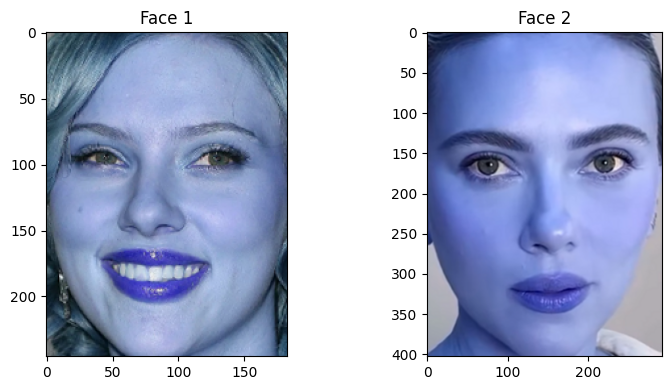

In [68]:
# Rutas de las imágenes
img1_path = "./data/scarlett-johansson/ref/img-ref-00.png"
img2_path = "./data/scarlett-johansson/ref/img-ref-04.png"

#original image in bgr ndarray
bgr_image1 = cv2.imread(img1_path)
bgr_image2 = cv2.imread(img2_path)

#extraer los rostros de ambas imagenes
rgb_faces_img1 = DeepFace.extract_faces(img_path=img1_path, detector_backend='retinaface', enforce_detection=True)
rgb_faces_img2 = DeepFace.extract_faces(img_path=img2_path, detector_backend='retinaface', enforce_detection=True)

# Asegurarse de que haya al menos un rostro detectado en ambas imágenes
if len(faces_img1) > 0 and len(faces_img2) > 0:
    
    # Obtener el primer rostro detectado en cada imagen
    face_img1 = rgb_faces_img1[0]['face']
    face_img2 = rgb_faces_img2[0]['face']

    # Separar los canales R, G, B
    R1, G1, B1 = face_img1.T  # .T transpone el array, separando los canales
    bgr_image_array_1 = np.array((B1, G1, R1)).T
    bgr_image1_uint8 = (bgr_image_array_1*255).astype(np.uint8)
    
    R2, G2, B2 = face_img2.T
    bgr_image_array_2 = np.array((B2, G2, R2)).T
    bgr_image2_uint8 = (bgr_image_array_2*255).astype(np.uint8)
    
    # Realizar la verificación entre los dos rostros
    result = DeepFace.verify(
        img1_path=bgr_image1_uint8,
        img2_path=bgr_image2_uint8, 
        detector_backend="skip",
        model_name="Facenet512",
        distance_metric="cosine",
        threshold=0.44,
        enforce_detection=True
    )

    # Imprimir los resultados de la verificación
    print(result)
    
    # Mostrar los rostros detectados usando matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Crear una figura con dos subplots

    # Mostrar el primer rostro
    axes[0].imshow(bgr_image1_uint8)
    axes[0].set_title("Face 1")
    axes[0].axis(True) 

    # Mostrar el segundo rostro
    axes[1].imshow(bgr_image2_uint8)
    axes[1].set_title("Face 2")
    axes[1].axis(True) 

    plt.tight_layout()  # Ajustar el layout para evitar solapamientos
    plt.show()

else:
    print("No found faces.")

extracting faces...
100.000%

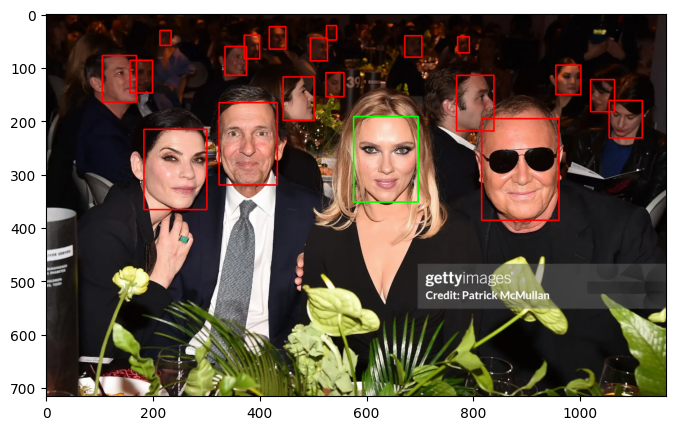

Index: 2 Distance: 0.2906 Threshold: 0.49 Metric: cosine
Index: 11 Distance: 0.8665 Threshold: 0.49 Metric: cosine
Index: 15 Distance: 0.9010 Threshold: 0.49 Metric: cosine
Index: 16 Distance: 0.9174 Threshold: 0.49 Metric: cosine
Index: 18 Distance: 0.9300 Threshold: 0.49 Metric: cosine
Index: 12 Distance: 0.9304 Threshold: 0.49 Metric: cosine
Index: 17 Distance: 0.9426 Threshold: 0.49 Metric: cosine
Index: 3 Distance: 0.9543 Threshold: 0.49 Metric: cosine
Index: 19 Distance: 0.9639 Threshold: 0.49 Metric: cosine
Index: 6 Distance: 0.9834 Threshold: 0.49 Metric: cosine
Index: 10 Distance: 0.9855 Threshold: 0.49 Metric: cosine
Index: 8 Distance: 1.0106 Threshold: 0.49 Metric: cosine
Index: 9 Distance: 1.0136 Threshold: 0.49 Metric: cosine
Index: 13 Distance: 1.0170 Threshold: 0.49 Metric: cosine
Index: 14 Distance: 1.0205 Threshold: 0.49 Metric: cosine
Index: 1 Distance: 1.0214 Threshold: 0.49 Metric: cosine
Index: 0 Distance: 1.0282 Threshold: 0.49 Metric: cosine
Index: 5 Distance: 1.

In [87]:
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["Facenet", "Facenet512", "VGG-Face", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace","GhostFaceNet"]

#ruta de la imagen original y del rostro objetivo (face_target)
image_path = "./data/scarlett-johansson/test/img-16.png"
face_target_path = "./data/scarlett-johansson/ref/img-ref-00.png"

# Cargar la imagen original
image = cv2.imread(image_path)

# Extraer los rostros de la imagen original
print("extracting faces...")
faces = DeepFace.extract_faces(img_path=image_path, detector_backend='retinaface', enforce_detection=True)

# Extraer el rostro objetivo (face_target) de la imagen de referencia
target_face_data = DeepFace.extract_faces(img_path=face_target_path, detector_backend='retinaface', enforce_detection=True)

# Inicializar la lista para almacenar los resultados
results = []

# Asegurarse de que se detectó el rostro objetivo
if len(target_face_data) > 0:
    target_face = target_face_data[0]['face']  # Obtener el rostro objetivo

    R1, G1, B1 = target_face.T
    __bgr_target_face = np.array((B1, G1, R1)).T
    bgr_target_face = (__bgr_target_face*255).astype(np.uint8)

    total_faces:int = len(faces)
    i:int = 0
    #iterar sobre cada rostro detectado en la imagen
    for face_data in faces:

        loading = str.format("{0:.3f}", ((i+0.0)/(0.0+total_faces-1.0))*100.0)
        print("\r" + loading + "%", end="")
        
        facial_area = face_data['facial_area']  #Obtener el area facial (bounding box)
        face = face_data['face']  #Obtener el rostro extraido

        R, G, B = face.T
        __bgr_face = np.array((B, G, R)).T
        bgr_face = (__bgr_face*255).astype(np.uint8)
        
        # Realizar la comparación (verificación) entre el rostro detectado y el rostro objetivo
        result = DeepFace.verify(
            img1_path=bgr_target_face,
            img2_path=bgr_face,
            detector_backend="skip",  #omitir la deteccion ya que estan los rostros
            model_name="Facenet512",
            distance_metric="cosine",
            threshold=0.49,
            enforce_detection=True
        )

        results.append([i, result['distance'], result['threshold'], 'cosine'])
        
        #si coinciden (verified=True), dibujar un rectángulo verde, sino, dibujar uno rojo
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        if result['verified']:
            color = (0, 255, 0)  # Verde
            #print(result)
        else:
            color = (0, 0, 255)  # Rojo
        
        #dibujar el rectangulo en la imagen original
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        i += 1

    results.sort(key=lambda x: x[1])
    
    #convertir la imagen de BGR a RGB para visualizarla con Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Mostrar la imagen con los recuadros
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis(True)
    plt.show()
    
    for res in results:
        print(f"Index: {res[0]} Distance: {res[1]:.4f} Threshold: {res[2]} Metric: {res[3]}")
    

else:
    print("The target face was not detected.")